In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta

In [2]:
pd.options.display.float_format='{:.4f}'.format
plt.rcParams['figure.figsize'] = [8,8]
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1) 
sns.set(style='darkgrid')
import matplotlib.ticker as plticker
%matplotlib inline

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

In [4]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [5]:
df_country = pd.read_csv("Country-data.csv")

df_country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2000,10.0000,7.5800,44.9000,1610,9.4400,56.2000,5.8200,553
1,Albania,16.6000,28.0000,6.5500,48.6000,9930,4.4900,76.3000,1.6500,4090
2,Algeria,27.3000,38.4000,4.1700,31.4000,12900,16.1000,76.5000,2.8900,4460
3,Angola,119.0000,62.3000,2.8500,42.9000,5900,22.4000,60.1000,6.1600,3530
4,Antigua and Barbuda,10.3000,45.5000,6.0300,58.9000,19100,1.4400,76.8000,2.1300,12200


In [6]:
df_structure = pd.read_csv("data-dictionary+.csv")
df_structure.head(10)

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 1000 live births
2,exports,Exports of goods and services per capita. Given as %age of the GDP per capita
3,health,Total health spending per capita. Given as %age of GDP per capita
4,imports,Imports of goods and services per capita. Given as %age of the GDP per capita
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of the Total GDP
7,life_expec,The average number of years a new born child would live if the current mortality patterns are to remain the same
8,total_fer,The number of children that would be born to each woman if the current age-fertility rates remain the same.
9,gdpp,The GDP per capita. Calculated as the Total GDP divided by the total population.


In [7]:
df_null = df_country.isna().mean()*100
df_null

country      0.0000
child_mort   0.0000
exports      0.0000
health       0.0000
imports      0.0000
income       0.0000
inflation    0.0000
life_expec   0.0000
total_fer    0.0000
gdpp         0.0000
dtype: float64

In [8]:
df_country.dtypes

country       object 
child_mort    float64
exports       float64
health        float64
imports       float64
income        int64  
inflation     float64
life_expec    float64
total_fer     float64
gdpp          int64  
dtype: object

In [9]:
df_country.loc[df_country.duplicated()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


In [10]:
cat_col = df_country.select_dtypes(include = ['object']).columns
num_col = df_country.select_dtypes(exclude = ['object']).columns

(9.5, -0.5)

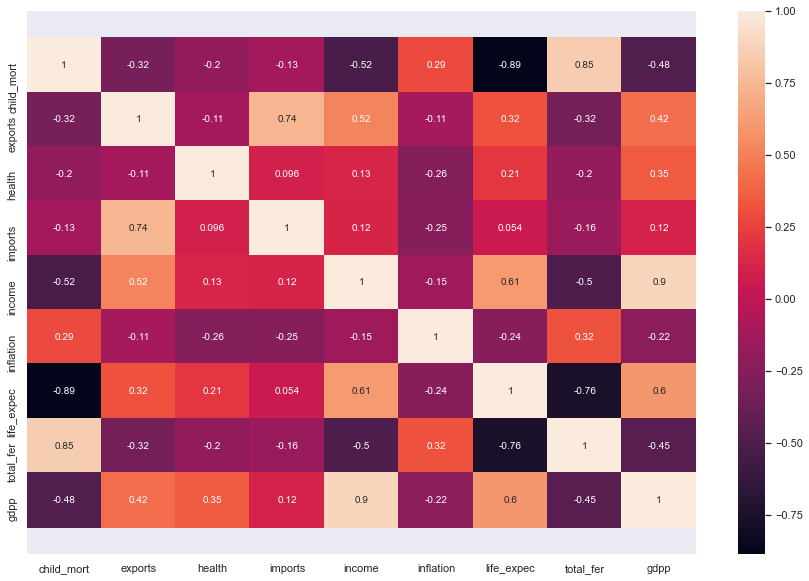

In [11]:
plt.figure(figsize = (15,10))        
ax = sns.heatmap(df_country.corr(),annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

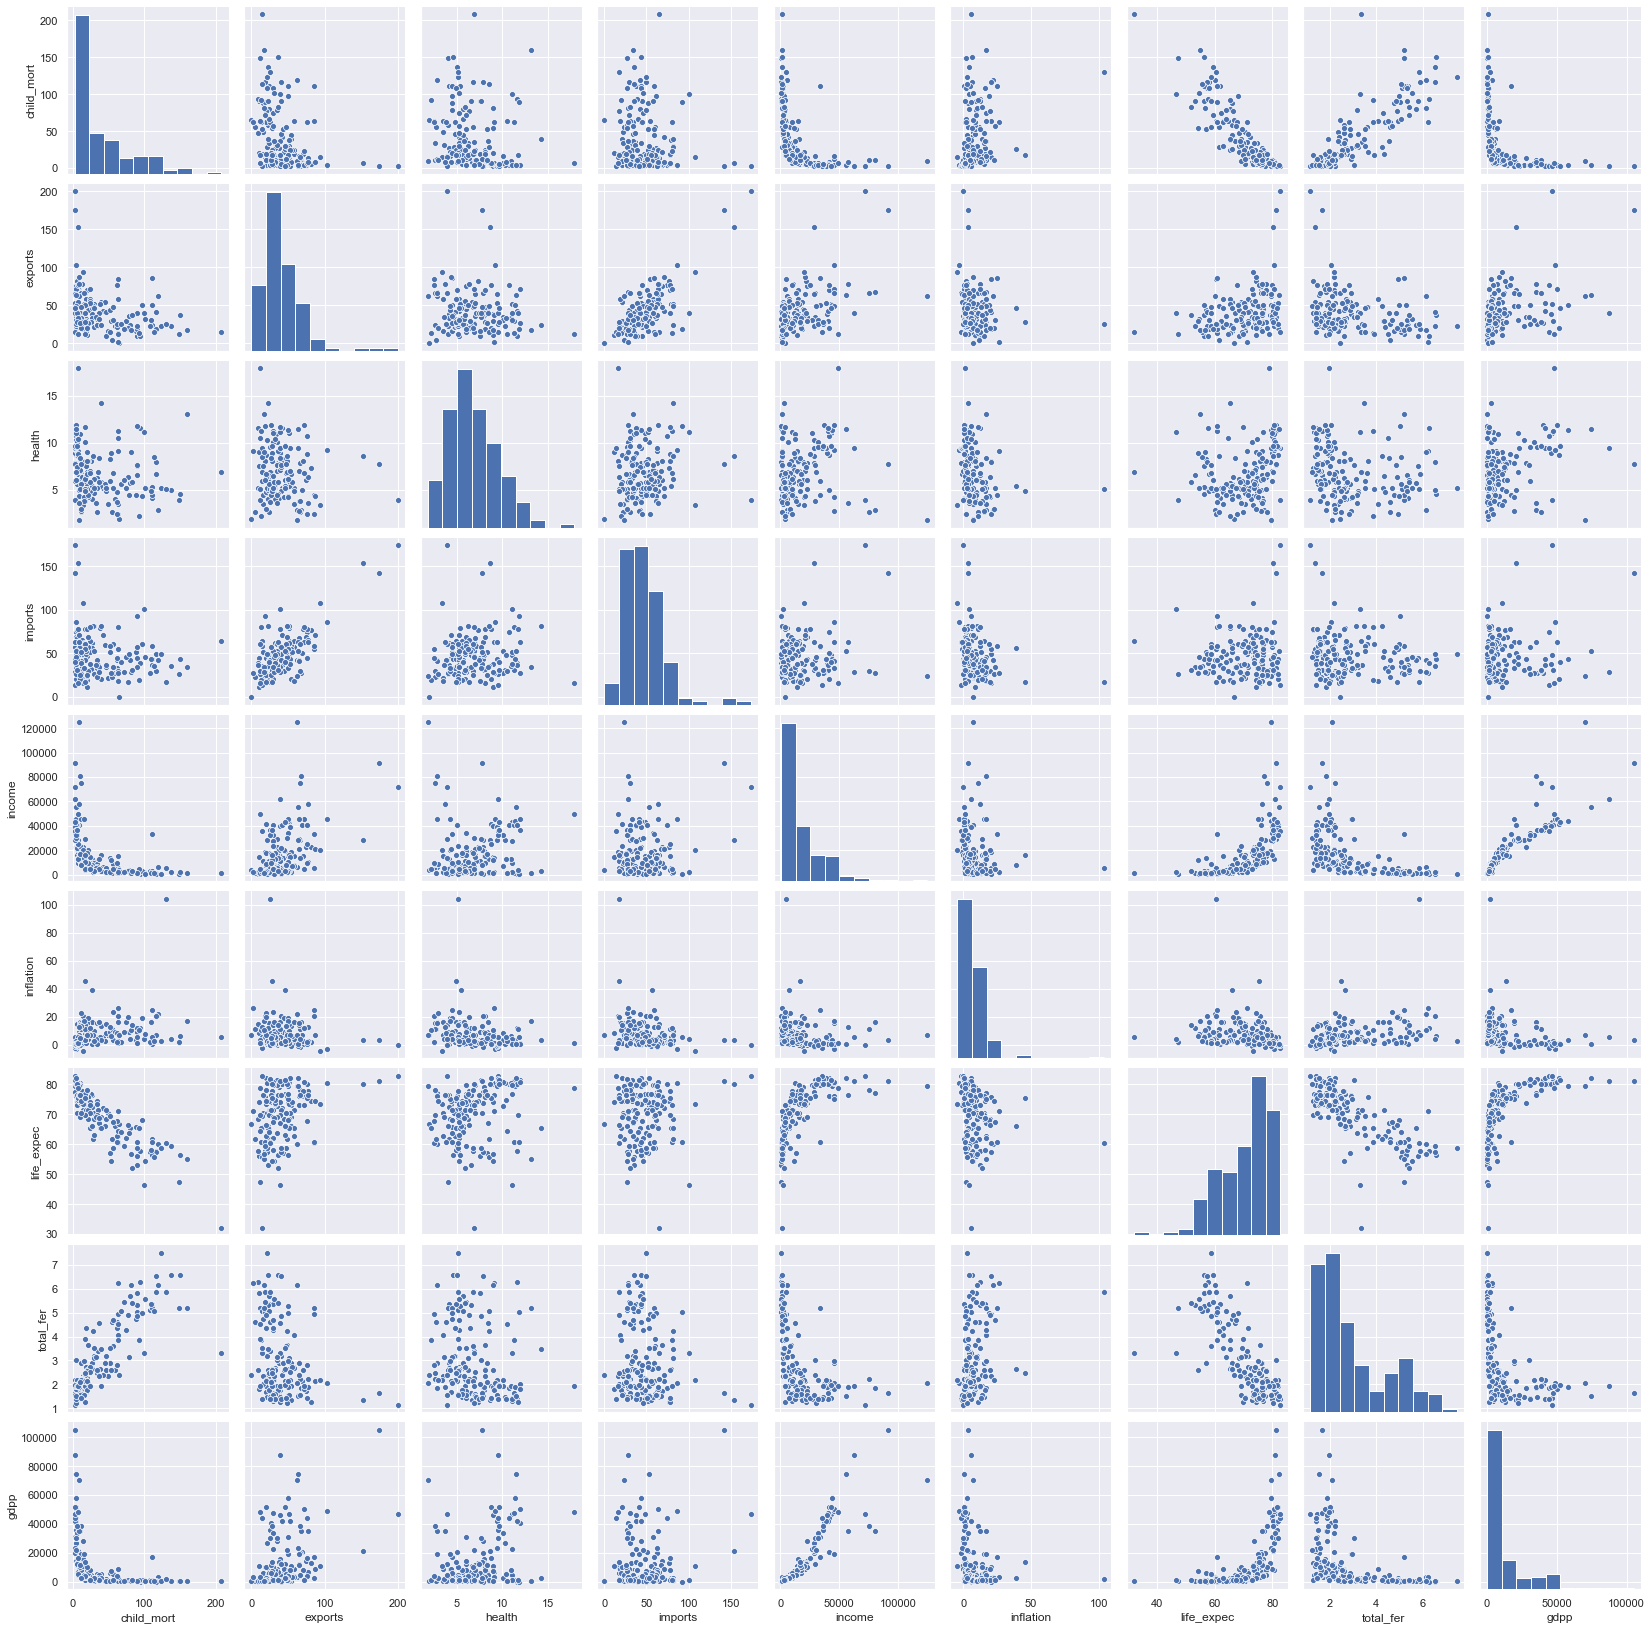

In [12]:
sns.pairplot(df_country)

In [13]:
df_country['exports'] = df_country['exports'] * df_country['gdpp']/100
df_country['imports'] = df_country['imports'] * df_country['gdpp']/100
df_country['health'] = df_country['health'] * df_country['gdpp']/100

df_country.head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2000,55.3000,41.9174,248.2970,1610,9.4400,56.2000,5.8200,553
1,Albania,16.6000,1145.2000,267.8950,1987.7400,9930,4.4900,76.3000,1.6500,4090
2,Algeria,27.3000,1712.6400,185.9820,1400.4400,12900,16.1000,76.5000,2.8900,4460
3,Angola,119.0000,2199.1900,100.6050,1514.3700,5900,22.4000,60.1000,6.1600,3530
4,Antigua and Barbuda,10.3000,5551.0000,735.6600,7185.8000,19100,1.4400,76.8000,2.1300,12200


In [14]:
df_country_drop = df_country.copy()
country = df_country_drop.pop('country')

df_country_drop.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2000,55.3000,41.9174,248.2970,1610,9.4400,56.2000,5.8200,553
1,16.6000,1145.2000,267.8950,1987.7400,9930,4.4900,76.3000,1.6500,4090
2,27.3000,1712.6400,185.9820,1400.4400,12900,16.1000,76.5000,2.8900,4460
3,119.0000,2199.1900,100.6050,1514.3700,5900,22.4000,60.1000,6.1600,3530
4,10.3000,5551.0000,735.6600,7185.8000,19100,1.4400,76.8000,2.1300,12200


In [15]:
warnings.filterwarnings("ignore")
scaler = StandardScaler()
df_country_scaled = scaler.fit_transform(df_country_drop)

df_country_scaled

array([[ 1.29153238, -0.4110113 , -0.56503989, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.35019096, -0.43921769, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.31852577, -0.48482608, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541, -0.36146329, -0.53848844, ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.39216643, -0.55059641, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.38395214, -0.54049845, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [16]:
pca = PCA(svd_solver='randomized', random_state=42)

pca.fit(df_country_scaled)

pca.components_

array([[-0.31639186,  0.34288671,  0.358535  ,  0.34486492,  0.38004113,
        -0.14308531,  0.34385651, -0.30284224,  0.39998795],
       [ 0.47626735,  0.39731091,  0.1550529 ,  0.37078075,  0.12838448,
         0.22126089, -0.36981973,  0.4597152 ,  0.2006241 ],
       [-0.15001225, -0.03057367, -0.07570322, -0.07217386,  0.14576421,
         0.94841868,  0.19675173, -0.07783431,  0.01033941],
       [-0.14805195,  0.44942527, -0.59971228,  0.46179779, -0.15480592,
        -0.00762798, -0.01839465, -0.21392805, -0.36477239],
       [ 0.1019948 , -0.03853829, -0.49319984, -0.2527867 ,  0.79407469,
        -0.13642345, -0.15404105, -0.02033568,  0.08750149],
       [ 0.19658519, -0.03891112,  0.18069888, -0.01217988, -0.03814681,
         0.10840284, -0.58600986, -0.75390075,  0.04538167],
       [ 0.76126725, -0.01366973, -0.06461567,  0.02718244, -0.02311312,
        -0.02207663,  0.58120846, -0.27314534, -0.04402264],
       [ 0.00644411, -0.05526371,  0.43007213,  0.1311355 ,  0

In [17]:
pca.explained_variance_ratio_

array([5.89372984e-01, 1.84451685e-01, 9.91147170e-02, 6.07227801e-02,
       3.02917253e-02, 2.45982702e-02, 9.39743701e-03, 1.55641971e-03,
       4.93981394e-04])

Text(0, 0.5, 'Variance Ratio')

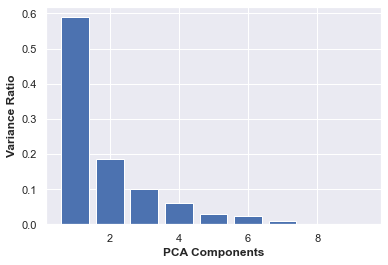

In [18]:
ax = plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.xlabel("PCA Components",fontweight = 'bold')
plt.ylabel("Variance Ratio",fontweight = 'bold')

Text(0, 0.5, 'Cumulative Explained Variance')

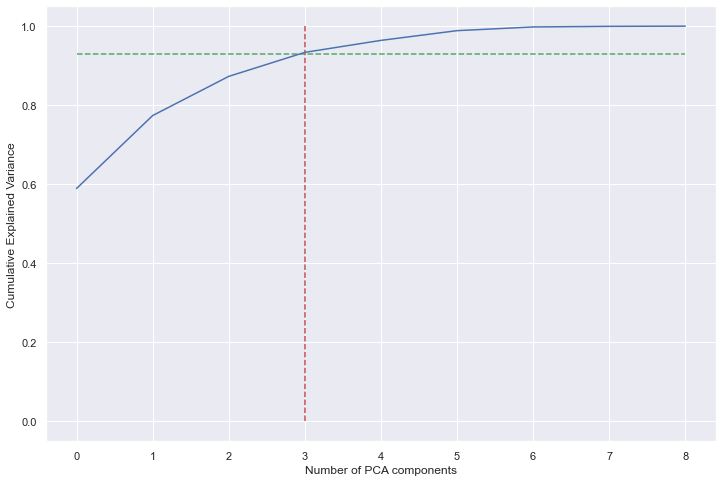

In [19]:
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.vlines(x=3, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.93, xmax=8, xmin=0, colors="g", linestyles="--")
plt.xlabel('Number of PCA components')
plt.ylabel('Cumulative Explained Variance')

In [20]:
org_col = list(df_country.drop(['country'],axis=1).columns)
attributes_pca = pd.DataFrame({'Attribute':org_col,'PC_1':pca.components_[0],'PC_2':pca.components_[1],'PC_3':pca.components_[2]})

attributes_pca

,Attribute,PC_1,PC_2,PC_3
0,child_mort,-0.3164,0.4763,-0.1500
1,exports,0.3429,0.3973,-0.0306
2,health,0.3585,0.1551,-0.0757
3,imports,0.3449,0.3708,-0.0722
4,income,0.3800,0.1284,0.1458
5,inflation,-0.1431,0.2213,0.9484
6,life_expec,0.3439,-0.3698,0.1968
7,total_fer,-0.3028,0.4597,-0.0778
8,gdpp,0.4000,0.2006,0.0103


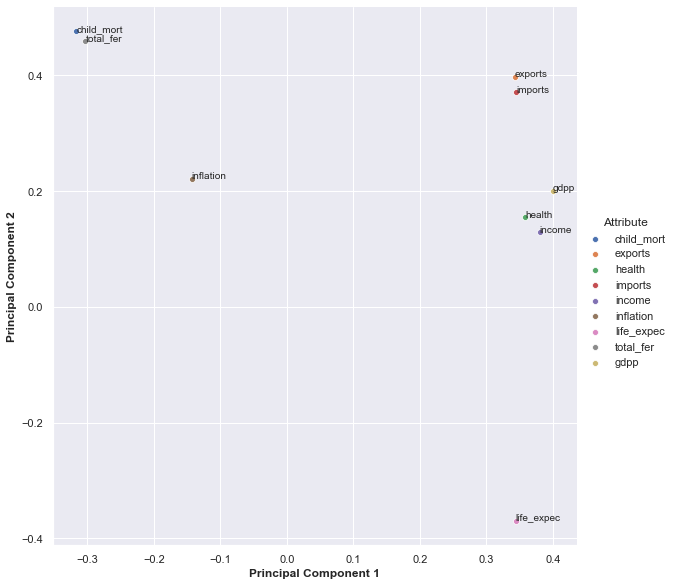

In [21]:
sns.pairplot(data=attributes_pca, x_vars=["PC_1"], y_vars=["PC_2"], hue = "Attribute" ,height=8)
plt.xlabel("Principal Component 1",fontweight = 'bold')
plt.ylabel("Principal Component 2",fontweight = 'bold')

for i,txt in enumerate(attributes_pca.Attribute):
    plt.annotate(txt, (attributes_pca.PC_1[i],attributes_pca.PC_2[i]))

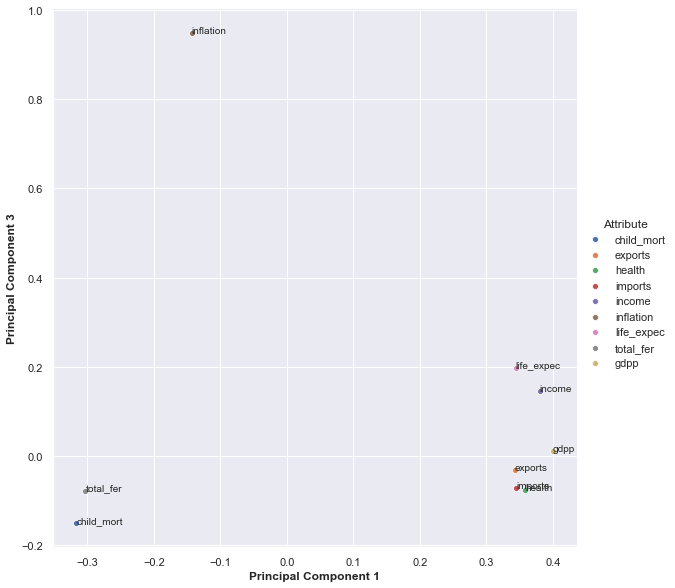

In [22]:
sns.pairplot(data=attributes_pca, x_vars=["PC_1"], y_vars=["PC_3"], hue = "Attribute" ,height=8)
plt.xlabel("Principal Component 1",fontweight = 'bold')
plt.ylabel("Principal Component 3",fontweight = 'bold')

for i,txt in enumerate(attributes_pca.Attribute):
    plt.annotate(txt, (attributes_pca.PC_1[i],attributes_pca.PC_3[i]))

In [23]:
inc_pca = IncrementalPCA(n_components=3)

df_inc_pca = inc_pca.fit_transform(df_country_scaled)
df_inc_pca

array([[-2.63744157e+00,  1.46903797e+00, -5.41359106e-01],
       [-2.22769569e-02, -1.43189586e+00, -2.07009539e-02],
       [-4.57626261e-01, -6.73300938e-01,  9.61867281e-01],
       [-2.72452030e+00,  2.17458267e+00,  6.06686548e-01],
       [ 6.49848516e-01, -1.02437392e+00, -2.50102847e-01],
       [ 3.71968554e-02, -6.80889086e-01,  1.46696276e+00],
       [-3.32691520e-01, -1.27451685e+00,  1.76636110e-01],
       [ 3.18036154e+00, -2.50784878e-01, -1.16877257e-01],
       [ 3.81568156e+00,  2.56083499e-01, -2.70495294e-01],
       [-4.67515152e-01, -4.93492360e-01,  6.03288028e-01],
       [ 1.49875246e+00, -4.28907400e-01, -5.50237572e-01],
       [ 1.47097104e+00, -3.26795693e-01,  4.28411771e-01],
       [-1.01419903e+00, -7.11807758e-01, -1.16988551e-01],
       [ 8.45238116e-01, -1.00860625e+00, -4.17261615e-01],
       [-1.34473920e-02, -9.82186148e-01,  8.80913018e-01],
       [ 3.96087770e+00,  8.38740841e-01, -2.94077196e-01],
       [-4.02707071e-01, -9.21816189e-01

In [24]:
df_pca = pd.DataFrame(df_inc_pca, columns=["PC_1", "PC_2","PC_3"])
df_pca_final = pd.concat([country, df_pca], axis=1)
df_pca_final.head()

,country,PC_1,PC_2,PC_3
0,Afghanistan,-2.6374,1.4690,-0.5414
1,Albania,-0.0223,-1.4319,-0.0207
2,Algeria,-0.4576,-0.6733,0.9619
3,Angola,-2.7245,2.1746,0.6067
4,Antigua and Barbuda,0.6498,-1.0244,-0.2501


(3.5, -0.5)

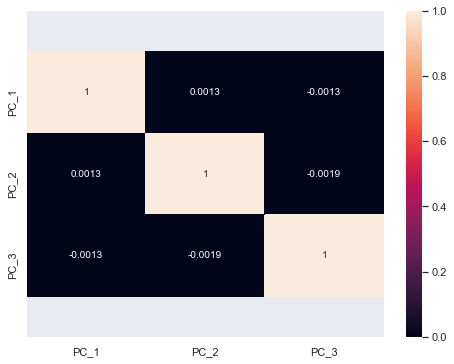

In [25]:
plt.figure(figsize = (8,6))        
ax = sns.heatmap(df_pca_final.corr(),annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

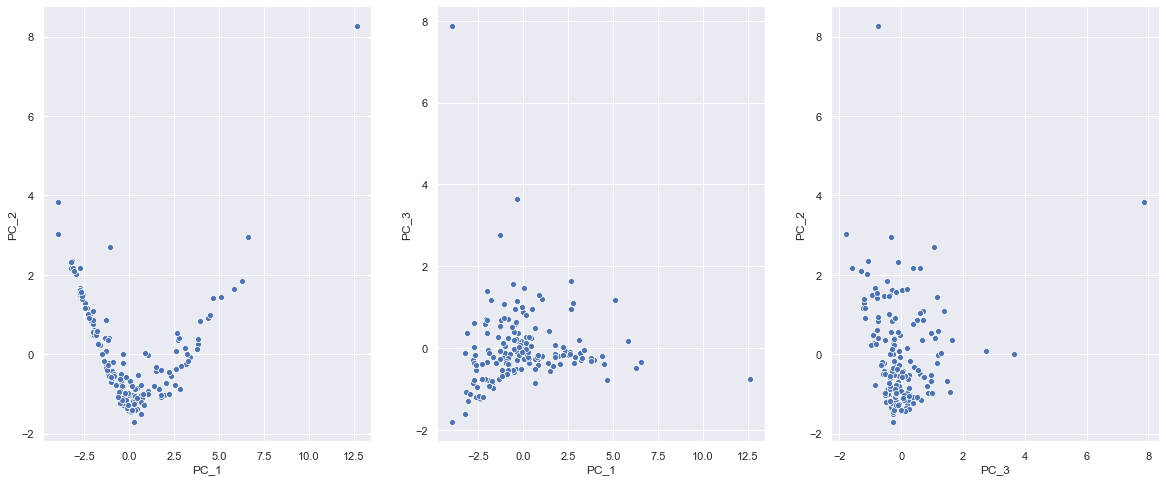

In [26]:
plt.figure(figsize=(20, 8))
plt.subplot(1,3,1)
sns.scatterplot(data=df_pca_final, x='PC_1', y='PC_2')
plt.subplot(1,3,2)
sns.scatterplot(data=df_pca_final, x='PC_1', y='PC_3')
plt.subplot(1,3,3)
sns.scatterplot(data=df_pca_final, x='PC_3', y='PC_2')

Text(0.5, 0, 'PC Components')

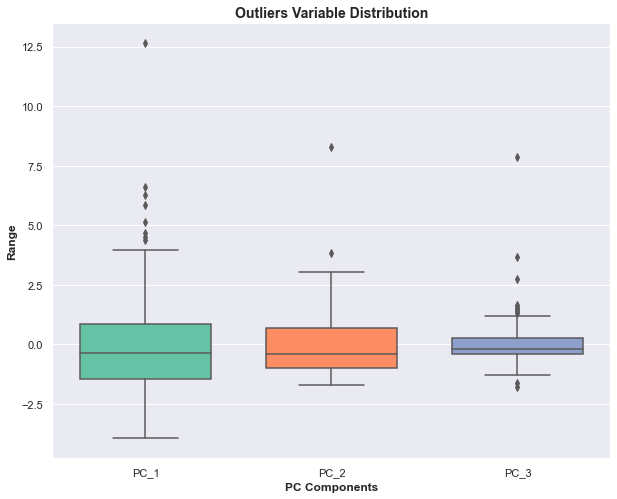

In [27]:
outliers = ['PC_1','PC_2','PC_3']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = df_pca_final[outliers], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("PC Components", fontweight = 'bold')

Text(0.5, 0, 'PC Components')

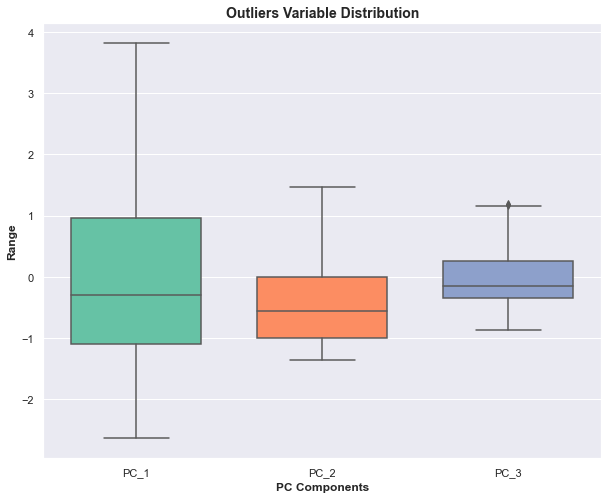

In [28]:
Q1 = df_pca_final.PC_1.quantile(0.05)
Q3 = df_pca_final.PC_1.quantile(0.95)
IQR = Q3 - Q1
df_pca_final = df_pca_final[(df_pca_final.PC_1 >= Q1) & (df_pca_final.PC_1 <= Q3)]



Q1 = df_pca_final.PC_2.quantile(0.05)
Q3 = df_pca_final.PC_2.quantile(0.95)
IQR = Q3 - Q1
df_pca_final = df_pca_final[(df_pca_final.PC_2 >= Q1) & (df_pca_final.PC_2 <= Q3)]



Q1 = df_pca_final.PC_3.quantile(0.05)
Q3 = df_pca_final.PC_3.quantile(0.95)
IQR = Q3 - Q1
df_pca_final = df_pca_final[(df_pca_final.PC_3 >= Q1) & (df_pca_final.PC_3 <= Q3)]

outliers = ['PC_1','PC_2','PC_3']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = df_pca_final[outliers], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("PC Components", fontweight = 'bold')

In [29]:
df_pca_final = df_pca_final.reset_index(drop=True)
df_pca_final_data = df_pca_final.drop(['country'],axis=1)
df_pca_final.head()

,country,PC_1,PC_2,PC_3
0,Afghanistan,-2.6374,1.4690,-0.5414
1,Algeria,-0.4576,-0.6733,0.9619
2,Antigua and Barbuda,0.6498,-1.0244,-0.2501
3,Armenia,-0.3327,-1.2745,0.1766
4,Australia,3.1804,-0.2508,-0.1169


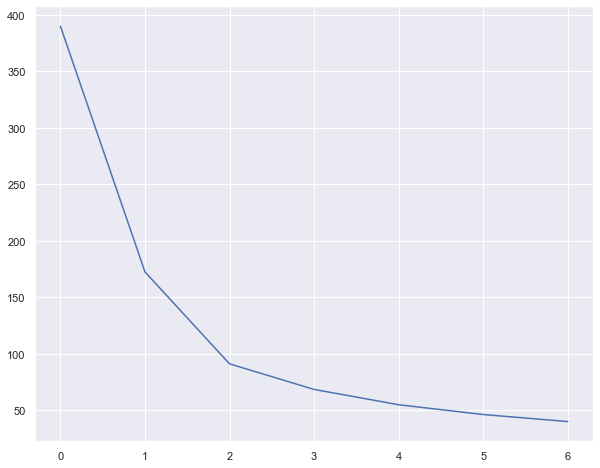

In [30]:
ssd = []
for num_clusters in list(range(1,8)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50,random_state= 100)
    model_clus.fit(df_pca_final_data)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

In [31]:
range_n_clusters =[2,3,4,5,6,7,8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50,random_state= 100)
    kmeans.fit(df_pca_final_data)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_pca_final_data, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.4873400103541441
For n_clusters=3, the silhouette score is 0.4639771456218248
For n_clusters=4, the silhouette score is 0.3987356568367148
For n_clusters=5, the silhouette score is 0.36085353704438133
For n_clusters=6, the silhouette score is 0.3714796089348357
For n_clusters=7, the silhouette score is 0.3609446319381151
For n_clusters=8, the silhouette score is 0.34963655749979905


In [32]:
cluster4 = KMeans(n_clusters=4, max_iter=50, random_state= 100)
cluster4.fit(df_pca_final_data)

cluster4.labels_

array([3, 1, 0, 1, 2, 2, 1, 0, 0, 1, 0, 1, 1, 1, 1, 3, 0, 0, 1, 2, 1, 0,
       1, 1, 3, 3, 0, 2, 0, 1, 1, 1, 1, 3, 0, 1, 2, 2, 3, 3, 1, 2, 3, 0,
       1, 1, 1, 0, 2, 1, 1, 1, 3, 0, 2, 1, 2, 1, 1, 3, 2, 1, 3, 0, 3, 0,
       0, 3, 0, 0, 2, 3, 0, 1, 1, 1, 1, 3, 1, 2, 0, 3, 0, 1, 1, 1, 0, 0,
       0, 1, 3, 1, 0, 0, 2, 3, 3, 0, 2, 1, 3, 1, 2, 1, 3, 1, 1, 0, 1, 3,
       1, 2, 2, 2, 0, 1, 1, 1, 3])

In [33]:
df_pca_final['Cluster_Id4'] = cluster4.labels_
df_pca_final.head()

,country,PC_1,PC_2,PC_3,Cluster_Id4
0,Afghanistan,-2.6374,1.4690,-0.5414,3
1,Algeria,-0.4576,-0.6733,0.9619,1
2,Antigua and Barbuda,0.6498,-1.0244,-0.2501,0
3,Armenia,-0.3327,-1.2745,0.1766,1
4,Australia,3.1804,-0.2508,-0.1169,2


In [34]:
df_pca_final['Cluster_Id4'].value_counts()

1    48
0    29
3    23
2    19
Name: Cluster_Id4, dtype: int64

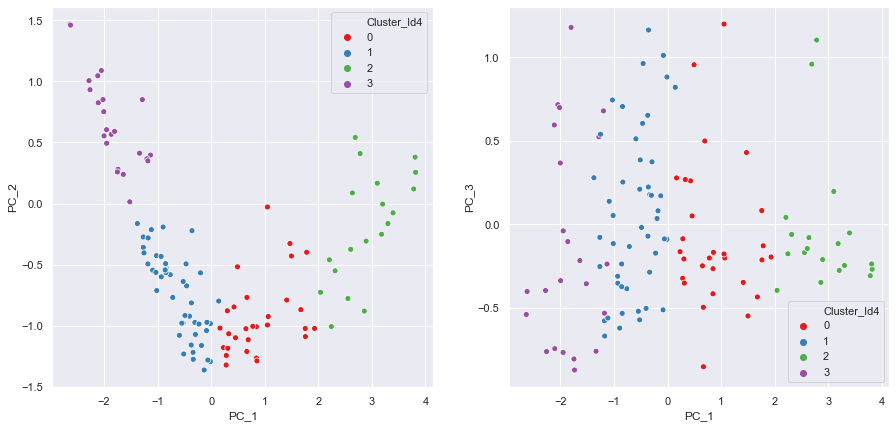

In [35]:
fig, axes = plt.subplots(1,2, figsize=(15,7))

sns.scatterplot(x='PC_1',y='PC_2',hue='Cluster_Id4',legend='full',palette="Set1",data=df_pca_final,ax=axes[0])
sns.scatterplot(x='PC_1',y='PC_3',hue='Cluster_Id4',legend='full',palette="Set1",data=df_pca_final,ax=axes[1])

In [36]:
df_pca_final = df_pca_final.drop('Cluster_Id4',axis=1)

cluster5 = KMeans(n_clusters=5, max_iter=50,random_state=100)
cluster5.fit(df_pca_final_data)

KMeans(max_iter=50, n_clusters=5, random_state=100)

In [37]:
cluster5.labels_

array([1, 0, 3, 0, 2, 2, 0, 3, 3, 4, 3, 0, 4, 4, 4, 1, 0, 0, 4, 2, 4, 0,
       0, 0, 1, 1, 3, 2, 3, 0, 0, 4, 0, 1, 3, 4, 2, 2, 1, 1, 0, 2, 1, 3,
       0, 4, 4, 3, 2, 4, 4, 0, 1, 3, 2, 0, 2, 4, 0, 1, 2, 4, 1, 3, 1, 0,
       3, 1, 0, 0, 2, 1, 0, 4, 0, 4, 4, 1, 4, 2, 0, 1, 0, 0, 0, 4, 3, 3,
       0, 0, 1, 4, 3, 3, 3, 1, 1, 3, 3, 0, 1, 0, 2, 4, 1, 4, 0, 0, 4, 1,
       0, 2, 2, 2, 0, 4, 4, 0, 1])

In [38]:
df_pca_final['Cluster_Id'] = cluster5.labels_
df_pca_final.head()

,country,PC_1,PC_2,PC_3,Cluster_Id
0,Afghanistan,-2.6374,1.4690,-0.5414,1
1,Algeria,-0.4576,-0.6733,0.9619,0
2,Antigua and Barbuda,0.6498,-1.0244,-0.2501,3
3,Armenia,-0.3327,-1.2745,0.1766,0
4,Australia,3.1804,-0.2508,-0.1169,2


In [39]:
df_pca_final['Cluster_Id'].value_counts()

0    35
4    25
1    23
3    19
2    17
Name: Cluster_Id, dtype: int64

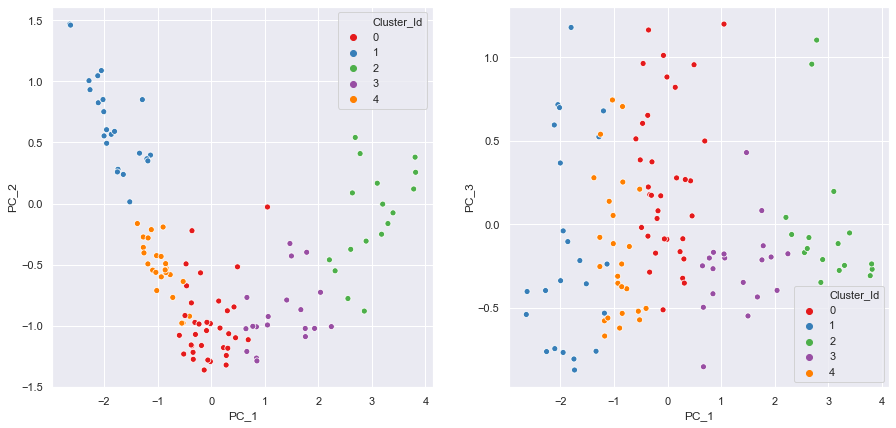

In [40]:
fig, axes = plt.subplots(1,2, figsize=(15,7))

sns.scatterplot(x='PC_1',y='PC_2',hue='Cluster_Id',legend='full',palette="Set1",data=df_pca_final,ax=axes[0])
sns.scatterplot(x='PC_1',y='PC_3',hue='Cluster_Id',legend='full',palette="Set1",data=df_pca_final,ax=axes[1])

In [41]:
df_merge = pd.merge(df_country,df_pca_final,on='country')
df_merge_col = df_merge[['country','child_mort','exports','imports','health','income','inflation','life_expec','total_fer','gdpp','Cluster_Id']]

# Creating df with mean values
cluster_child = pd.DataFrame(df_merge_col.groupby(["Cluster_Id"]).child_mort.mean())
cluster_export = pd.DataFrame(df_merge_col.groupby(["Cluster_Id"]).exports.mean())
cluster_import = pd.DataFrame(df_merge_col.groupby(["Cluster_Id"]).imports.mean())
cluster_health = pd.DataFrame(df_merge_col.groupby(["Cluster_Id"]).health.mean())
cluster_income = pd.DataFrame(df_merge_col.groupby(["Cluster_Id"]).income.mean())
cluster_inflation = pd.DataFrame(df_merge_col.groupby(["Cluster_Id"]).inflation.mean())         
cluster_lifeexpec = pd.DataFrame(df_merge_col.groupby(["Cluster_Id"]).life_expec.mean())
cluster_totalfer = pd.DataFrame(df_merge_col.groupby(["Cluster_Id"]).total_fer.mean())
cluster_gdpp = pd.DataFrame(df_merge_col.groupby(["Cluster_Id"]).gdpp.mean())

df_concat = pd.concat([pd.Series([0,1,2,3,4]),cluster_child,cluster_export,cluster_import,cluster_health,cluster_income
                       ,cluster_inflation,cluster_lifeexpec,cluster_totalfer,cluster_gdpp], axis=1)
df_concat.columns = ["Cluster_Id", "Child_Mortality", "Exports", "Imports","Health_Spending","Income","Inflation","Life_Expectancy","Total_Fertility","GDPpcapita"]
df_concat.head()

,Cluster_Id,Child_Mortality,Exports,Imports,Health_Spending,Income,Inflation,Life_Expectancy,Total_Fertility,GDPpcapita
0,0,17.9000,2934.3289,2790.2077,417.9462,14125.7143,8.2583,74.0543,2.0854,6943.4286
1,1,68.4783,884.7745,838.6342,135.8739,4650.8696,10.7113,62.1696,4.5074,2152.7391
2,2,5.1412,16736.1118,15324.9353,3954.5006,41705.8824,2.8236,80.4765,1.7765,40911.7647
3,3,6.9000,9200.4895,9445.8053,1489.7879,25036.8421,0.9048,76.9579,1.6789,18810.5263
4,4,37.2160,931.7887,1241.5800,130.3515,5442.8000,6.6020,69.2320,2.9820,2416.8800


In [42]:
df_merge_col.head(5)

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,Cluster_Id
0,Afghanistan,90.2000,55.3000,248.2970,41.9174,1610,9.4400,56.2000,5.8200,553,1
1,Algeria,27.3000,1712.6400,1400.4400,185.9820,12900,16.1000,76.5000,2.8900,4460,0
2,Antigua and Barbuda,10.3000,5551.0000,7185.8000,735.6600,19100,1.4400,76.8000,2.1300,12200,3
3,Armenia,18.1000,669.7600,1458.6600,141.6800,6700,7.7700,73.3000,1.6900,3220,0
4,Australia,4.8000,10276.2000,10847.1000,4530.8700,41400,1.1600,82.0000,1.9300,51900,2


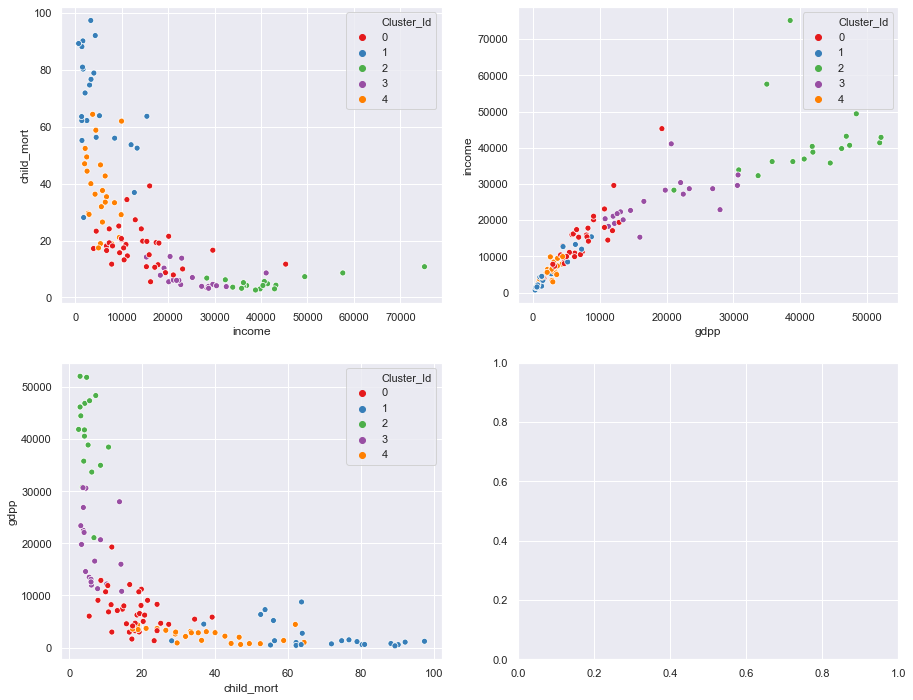

In [43]:
fig, axes = plt.subplots(2,2, figsize=(15,12))

sns.scatterplot(x = 'income', y = 'child_mort',hue='Cluster_Id',data = df_merge_col,legend='full',palette="Set1",ax=axes[0][0])
sns.scatterplot(x = 'gdpp', y = 'income',hue='Cluster_Id', data = df_merge_col,legend='full',palette="Set1",ax=axes[0][1])
sns.scatterplot(x = 'child_mort', y = 'gdpp',hue='Cluster_Id', data=df_merge_col,legend='full',palette="Set1",ax=axes[1][0])

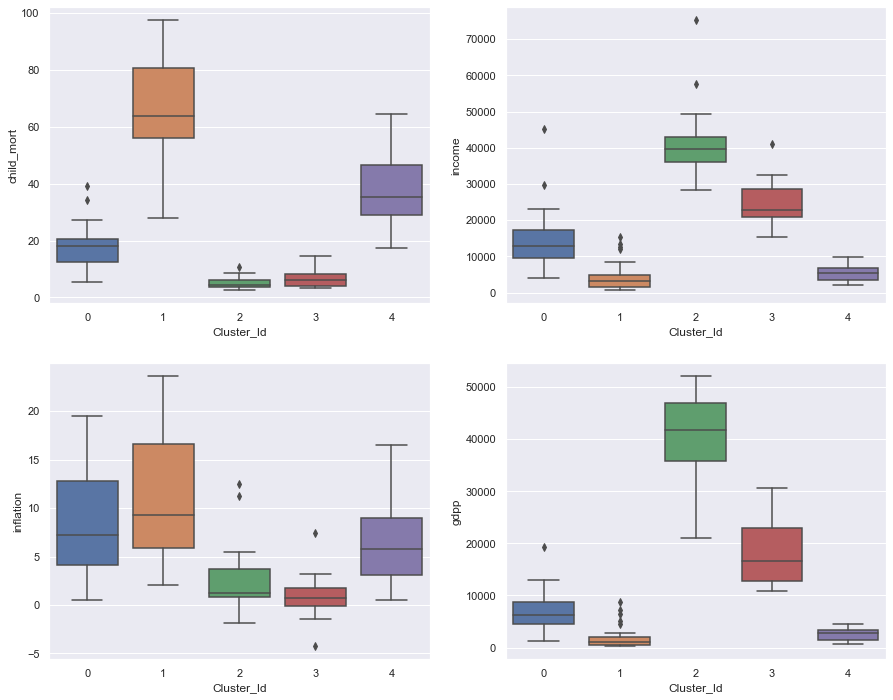

In [44]:
fig, axes = plt.subplots(2,2, figsize=(15,12))

sns.boxplot(x = 'Cluster_Id', y = 'child_mort', data = df_merge_col,ax=axes[0][0])
sns.boxplot(x = 'Cluster_Id', y = 'income', data = df_merge_col,ax=axes[0][1])
sns.boxplot(x = 'Cluster_Id', y = 'inflation', data=df_merge_col,ax=axes[1][0])
sns.boxplot(x = 'Cluster_Id', y = 'gdpp', data=df_merge_col,ax=axes[1][1])

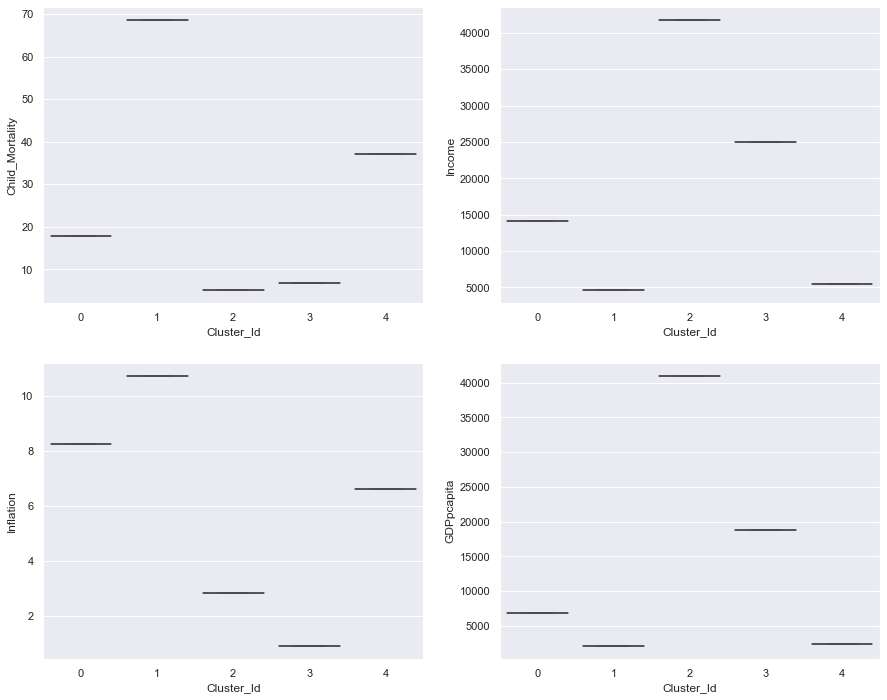

In [45]:
fig, axes = plt.subplots(2,2, figsize=(15,12))

sns.boxplot(x = 'Cluster_Id', y = 'Child_Mortality', data = df_concat,ax=axes[0][0])
sns.boxplot(x = 'Cluster_Id', y = 'Income', data = df_concat,ax=axes[0][1])
sns.boxplot(x = 'Cluster_Id', y = 'Inflation', data=df_concat,ax=axes[1][0])
sns.boxplot(x = 'Cluster_Id', y = 'GDPpcapita', data=df_concat,ax=axes[1][1])

In [46]:
df_merge_col[df_merge_col['Cluster_Id']==0]

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,Cluster_Id
1,Algeria,27.3000,1712.6400,1400.4400,185.9820,12900,16.1000,76.5000,2.8900,4460,0
3,Armenia,18.1000,669.7600,1458.6600,141.6800,6700,7.7700,73.3000,1.6900,3220,0
6,Azerbaijan,39.2000,3171.1200,1208.8800,343.3920,16000,13.8000,69.1000,1.9200,5840,0
11,Belarus,5.5000,3099.4200,3889.3500,338.2830,16200,15.1000,70.4000,1.4900,6030,0
16,Brazil,19.8000,1198.4000,1321.6000,1009.1200,14500,8.4100,74.2000,1.8000,11200,0
17,Bulgaria,10.8000,3433.6800,3625.2000,469.9080,15300,1.1100,73.9000,1.5700,6840,0
21,Chile,8.7000,4863.3000,4037.7000,1026.8400,19400,8.9600,79.1000,1.8800,12900,0
22,China,15.7000,1199.2800,1030.5600,231.1920,9530,6.9400,74.6000,1.5900,4560,0
23,Colombia,18.6000,993.7500,1112.5000,474.3750,10900,3.8600,76.4000,2.0100,6250,0
29,Dominican Republic,34.4000,1237.1500,1814.8500,338.9900,11100,5.4400,74.6000,2.6000,5450,0


In [47]:
df_merge_col[df_merge_col['Cluster_Id']==3]

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,Cluster_Id
2,Antigua and Barbuda,10.3000,5551.0000,7185.8000,735.6600,19100,1.4400,76.8000,2.1300,12200,3
7,Bahamas,13.8000,9800.0000,12236.0000,2209.2000,22900,-0.3930,73.8000,1.8600,28000,3
8,Bahrain,8.6000,14386.5000,10536.3000,1028.7900,41100,7.4400,76.0000,2.1600,20700,3
10,Barbados,14.2000,6320.0000,7792.0000,1275.2000,15300,0.3210,76.7000,1.7800,16000,3
26,Croatia,5.5000,5076.0000,5143.5000,1047.6000,20100,0.8210,76.3000,1.5500,13500,3
28,Czech Republic,3.4000,13068.0000,12454.2000,1560.2400,28300,-1.4300,77.5000,1.5100,19800,3
34,Estonia,4.5000,10964.6000,10030.2000,880.3800,22700,1.7400,76.0000,1.7200,14600,3
43,Greece,3.9000,5944.9000,8258.3000,2770.7000,28700,0.6730,80.4000,1.4800,26900,3
47,Hungary,6.0000,10715.8000,10021.5000,960.2300,22300,2.3300,74.5000,1.2500,13100,3
53,Israel,4.6000,10710.0000,10067.4000,2334.7800,29600,1.7700,81.4000,3.0300,30600,3


In [48]:
df_pca_final_data.head()

,PC_1,PC_2,PC_3
0,-2.6374,1.4690,-0.5414
1,-0.4576,-0.6733,0.9619
2,0.6498,-1.0244,-0.2501
3,-0.3327,-1.2745,0.1766
4,3.1804,-0.2508,-0.1169


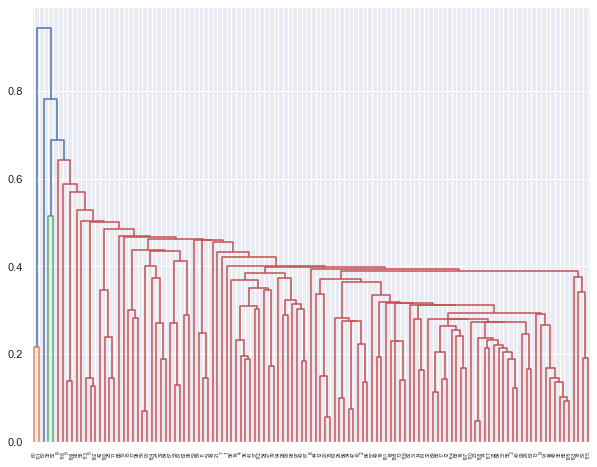

In [49]:
mergings = linkage(df_pca_final_data, method='single',metric='euclidean')
dendrogram(mergings)
plt.show()

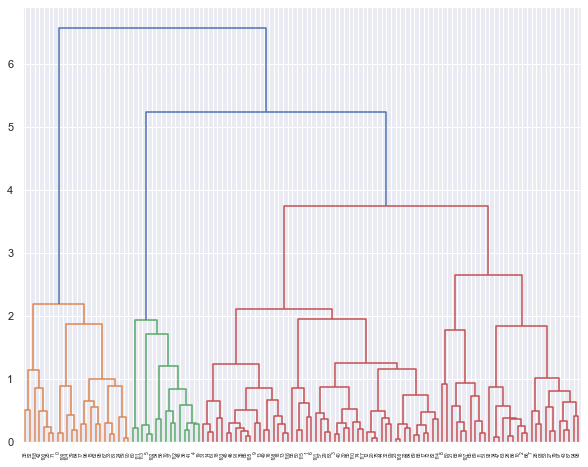

In [50]:
mergings = linkage(df_pca_final_data, method='complete',metric='euclidean')
dendrogram(mergings)
plt.show()

In [51]:
df_pca_hc = df_pca_final.copy()
df_pca_hc = df_pca_hc.drop('Cluster_Id',axis=1)
df_pca_hc.head()

,country,PC_1,PC_2,PC_3
0,Afghanistan,-2.6374,1.4690,-0.5414
1,Algeria,-0.4576,-0.6733,0.9619
2,Antigua and Barbuda,0.6498,-1.0244,-0.2501
3,Armenia,-0.3327,-1.2745,0.1766
4,Australia,3.1804,-0.2508,-0.1169


In [54]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 4).reshape(-1,))
df_hc = pd.concat([df_pca_hc, clusterCut], axis=1)
df_hc.columns = ['country', 'PC_1', 'PC_2','PC_3','Cluster_Id']

df_hc.head()

,country,PC_1,PC_2,PC_3,Cluster_Id
0,Afghanistan,-2.6374,1.4690,-0.5414,0
1,Algeria,-0.4576,-0.6733,0.9619,1
2,Antigua and Barbuda,0.6498,-1.0244,-0.2501,2
3,Armenia,-0.3327,-1.2745,0.1766,1
4,Australia,3.1804,-0.2508,-0.1169,3


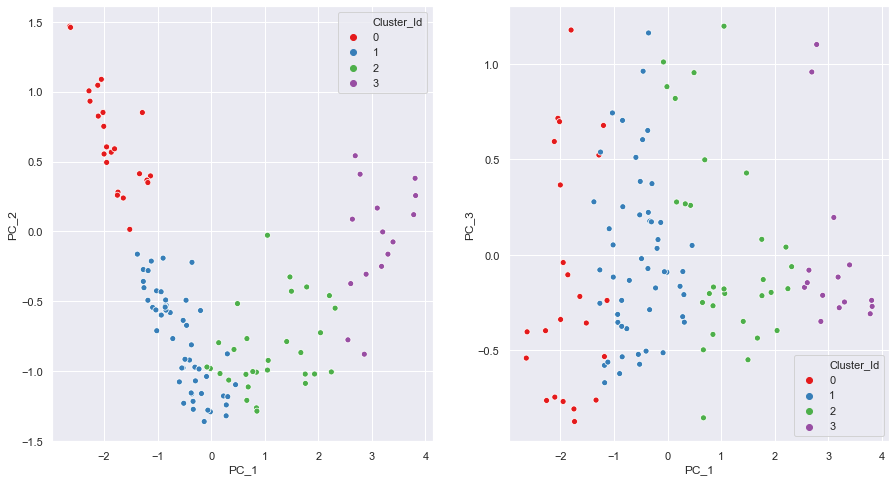

In [55]:
fig, axes = plt.subplots(1,2, figsize=(15,8))

sns.scatterplot(x='PC_1',y='PC_2',hue='Cluster_Id',legend='full',palette="Set1",data=df_hc,ax=axes[0])
sns.scatterplot(x='PC_1',y='PC_3',hue='Cluster_Id',legend='full',palette="Set1",data=df_hc,ax=axes[1])

In [57]:
df_merge_hc = pd.merge(df_country,df_hc,on='country')
df_merge_col_hc = df_merge[['country','child_mort','exports','imports','health','income','inflation','life_expec','total_fer','gdpp','Cluster_Id']]

df_merge_col_hc.head()

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,Cluster_Id
0,Afghanistan,90.2000,55.3000,248.2970,41.9174,1610,9.4400,56.2000,5.8200,553,1
1,Algeria,27.3000,1712.6400,1400.4400,185.9820,12900,16.1000,76.5000,2.8900,4460,0
2,Antigua and Barbuda,10.3000,5551.0000,7185.8000,735.6600,19100,1.4400,76.8000,2.1300,12200,3
3,Armenia,18.1000,669.7600,1458.6600,141.6800,6700,7.7700,73.3000,1.6900,3220,0
4,Australia,4.8000,10276.2000,10847.1000,4530.8700,41400,1.1600,82.0000,1.9300,51900,2


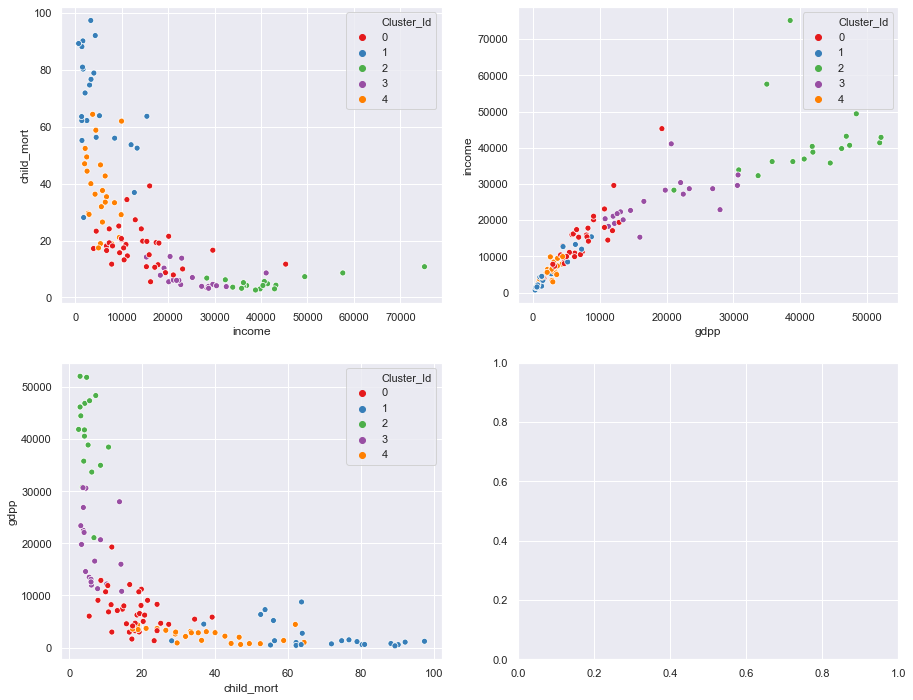

In [58]:
fig, axes = plt.subplots(2,2, figsize=(15,12))

sns.scatterplot(x = 'income', y = 'child_mort',hue='Cluster_Id',data = df_merge_col_hc,legend='full',palette="Set1",ax=axes[0][0])
sns.scatterplot(x = 'gdpp', y = 'income',hue='Cluster_Id', data = df_merge_col_hc,legend='full',palette="Set1",ax=axes[0][1])
sns.scatterplot(x = 'child_mort', y = 'gdpp',hue='Cluster_Id', data=df_merge_col_hc,legend='full',palette="Set1",ax=axes[1][0])

In [59]:
df_clus0 = df_merge_col[df_merge_col['Cluster_Id'] ==0]
df_clus3 = df_merge_col[df_merge_col['Cluster_Id'] ==3]
df_append= df_clus0.append(df_clus3)
df_append.head()

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,Cluster_Id
1,Algeria,27.3000,1712.6400,1400.4400,185.9820,12900,16.1000,76.5000,2.8900,4460,0
3,Armenia,18.1000,669.7600,1458.6600,141.6800,6700,7.7700,73.3000,1.6900,3220,0
6,Azerbaijan,39.2000,3171.1200,1208.8800,343.3920,16000,13.8000,69.1000,1.9200,5840,0
11,Belarus,5.5000,3099.4200,3889.3500,338.2830,16200,15.1000,70.4000,1.4900,6030,0
16,Brazil,19.8000,1198.4000,1321.6000,1009.1200,14500,8.4100,74.2000,1.8000,11200,0


In [60]:
df_append.describe()

,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,Cluster_Id
count,54.0000,54.0000,54.0000,54.0000,54.0000,54.0000,54.0000,54.0000,54.0000,54.0000
mean,14.0296,5139.0891,5131.9920,795.0757,17964.8148,5.6709,75.0759,1.9424,11118.8889,1.0556
std,8.0369,4098.7549,3823.6282,709.0333,8918.7656,5.5445,3.1693,0.4792,7561.1142,1.4461
min,3.2000,638.9600,1030.5600,89.6040,3910.0000,-4.2100,68.4000,1.2300,1310.0000,0.0000
25%,7.2000,1613.9575,1588.0225,338.4597,10600.0000,1.2075,73.3250,1.5550,5547.5000,0.0000
50%,14.0000,4052.4700,3757.6950,477.1875,17250.0000,4.1500,74.6500,1.9000,9070.0000,0.0000
75%,19.1750,7834.1250,8035.9000,1005.2525,22600.0000,8.5150,76.7750,2.2150,13400.0000,3.0000
max,39.2000,15046.2000,14718.6000,2928.7800,45300.0000,19.5000,81.9000,3.0300,30700.0000,3.0000


In [61]:
df_final_list = df_country[df_country['child_mort']>53]
df_final_list.shape

(48, 10)

In [62]:
df_final_list.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,48.0000,48.0000,48.0000,48.0000,48.0000,48.0000,48.0000,48.0000,48.0000
mean,93.0208,848.1537,97.5164,754.1698,3695.0625,11.6195,59.5500,4.9121,1797.5000
std,32.4204,2266.2194,149.2196,1509.6237,5325.9968,15.4064,6.5526,1.1486,2852.8295
min,53.7000,1.0769,12.8212,0.6511,609.0000,0.8850,32.1000,2.4100,231.0000
25%,63.8500,101.6303,31.9700,188.8055,1390.0000,3.7925,56.7250,4.3450,551.5000
50%,89.7500,188.2900,48.7265,313.8570,1900.0000,8.2150,60.2500,5.0550,932.0000
75%,111.0000,417.9150,72.7850,571.8375,3785.0000,16.2250,63.8500,5.5975,1377.5000
max,208.0000,14671.8000,766.0800,10071.9000,33700.0000,104.0000,71.1000,7.4900,17100.0000


In [63]:
df_final_list1 = df_final_list[df_final_list['income']<=3695]
df_final_list1.shape

(35, 10)

In [64]:
df_final_list1.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,35.0000,35.0000,35.0000,35.0000,35.0000,35.0000,35.0000,35.0000,35.0000
mean,98.7200,190.7614,56.9363,352.9760,1735.8000,8.4913,58.3771,5.2526,831.2000
std,32.8870,159.7151,56.7278,280.1672,769.1895,6.6906,6.9571,0.8977,606.5572
min,55.2000,20.6052,12.8212,90.5520,609.0000,0.8850,32.1000,3.3000,231.0000
25%,75.7000,80.3515,31.5122,170.5340,1215.0000,2.7900,56.2500,4.8100,470.5000
50%,90.5000,131.9850,41.9174,254.5600,1540.0000,6.3900,58.7000,5.2100,648.0000
75%,112.5000,224.5845,57.8575,400.2865,2135.0000,12.2000,62.0000,5.7650,1085.0000
max,208.0000,617.3200,328.3200,1190.5100,3370.0000,26.5000,71.1000,7.4900,3600.0000


In [65]:
df_final_list2 = df_final_list1[df_final_list1['gdpp']<=831]
df_final_list2.shape

(23, 10)

In [66]:
df_final_list2['country']

0      Afghanistan             
17     Benin                   
25     Burkina Faso            
26     Burundi                 
31     Central African Republic
36     Comoros                 
37     Congo, Dem. Rep.        
50     Eritrea                 
56     Gambia                  
63     Guinea                  
64     Guinea-Bissau           
66     Haiti                   
88     Liberia                 
93     Madagascar              
94     Malawi                  
97     Mali                    
106    Mozambique              
112    Niger                   
126    Rwanda                  
132    Sierra Leone            
147    Tanzania                
150    Togo                    
155    Uganda                  
Name: country, dtype: object

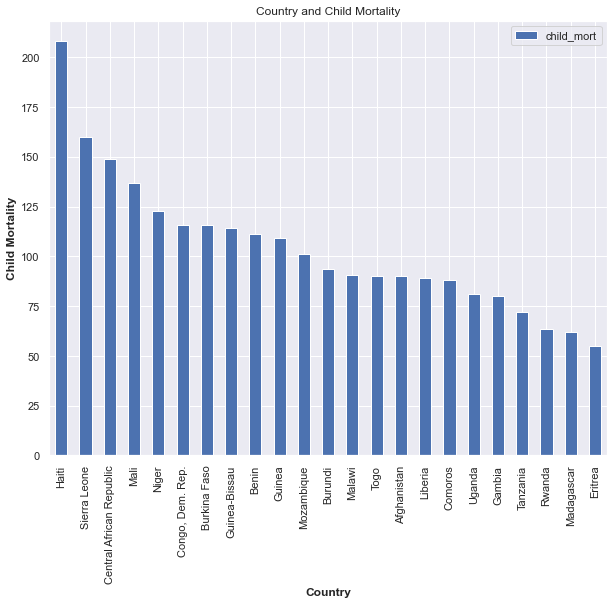

In [67]:
df_list_cm = pd.DataFrame(df_final_list2.groupby(['country'])['child_mort'].mean().sort_values(ascending = False))
df_list_cm.plot.bar()
plt.title('Country and Child Mortality')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("Child Mortality", fontsize = 12, fontweight = 'bold')
plt.show()

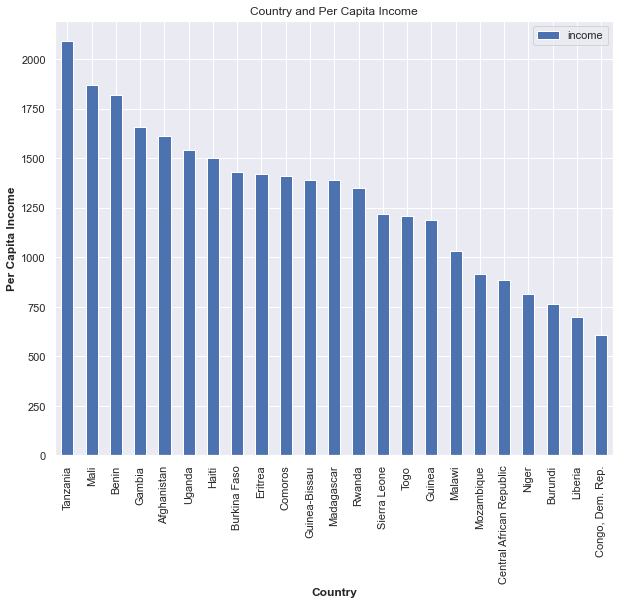

In [68]:
df_list_in = pd.DataFrame(df_final_list2.groupby(['country'])['income'].mean().sort_values(ascending = False))
df_list_in.plot.bar()
plt.title('Country and Per Capita Income')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("Per Capita Income", fontsize = 12, fontweight = 'bold')
plt.show()

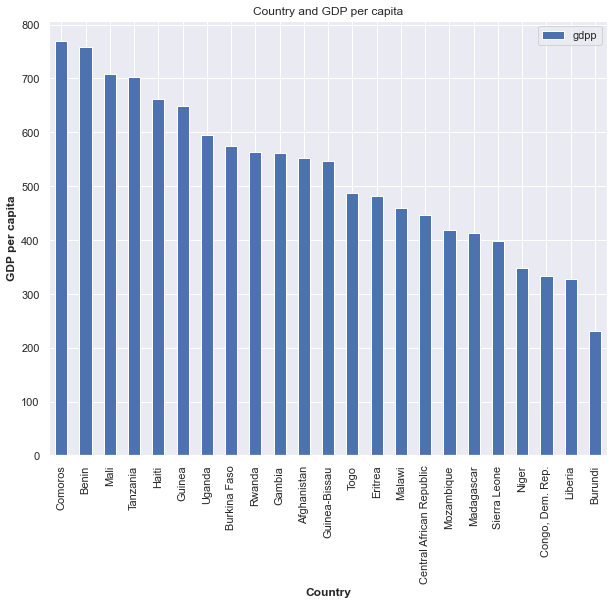

In [69]:
df_list_gdp = pd.DataFrame(df_final_list2.groupby(['country'])['gdpp'].mean().sort_values(ascending = False))
df_list_gdp.plot.bar()
plt.title('Country and GDP per capita')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("GDP per capita", fontsize = 12, fontweight = 'bold')
plt.show()

In [70]:
df_final_list2.reset_index(drop=True).country

0     Afghanistan             
1     Benin                   
2     Burkina Faso            
3     Burundi                 
4     Central African Republic
5     Comoros                 
6     Congo, Dem. Rep.        
7     Eritrea                 
8     Gambia                  
9     Guinea                  
10    Guinea-Bissau           
11    Haiti                   
12    Liberia                 
13    Madagascar              
14    Malawi                  
15    Mali                    
16    Mozambique              
17    Niger                   
18    Rwanda                  
19    Sierra Leone            
20    Tanzania                
21    Togo                    
22    Uganda                  
Name: country, dtype: object